# Demo to use sequential to build ANN model
Here the demo uses nn.Sequential() to build a simple ANN model to classify a multi-class dataset. The classification has a good accuracy of 93.67%. 

In [114]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

### 1. define the data

Text(0, 0.5, 'feature 2')

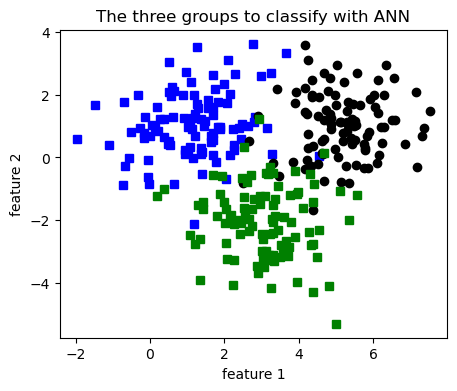

In [115]:
# create the data
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]
C = [  3, -2]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatenate the data and labels from the 3 groups
data_np = np.hstack((a, b, c)).T
labels_np = np.hstack((np.zeros((nPerClust)), np.ones((nPerClust)), 2*np.ones((nPerClust))))

# convert to pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long()

# plot the data
fig = plt.figure(figsize=(5,4))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.plot(data[np.where(labels == 2)[0], 0], data[np.where(labels == 2)[0], 1], 'gs')
plt.title('The three groups to classify with ANN')
plt.xlabel('feature 1')
plt.ylabel('feature 2')


### 2. Build the model

In [119]:
# build the model
# I have tested adding nn.Softmax() as the last layer and it actually hurts the performance. 
# So I kept the last layer empty so nn.CrossEntropyLoss() uses its builtin nn.LogSoftmax()
ANNClassify = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 3),
    # nn.Softmax()
)

# Use CrossEntropyLoss so torch automatically implements nn.LogSoftmax
loss_fun = nn.CrossEntropyLoss()

# define the optimizer, use standard optimizer
optimizer = torch.optim.SGD(ANNClassify.parameters(), lr=0.01)

### 3. Train the model

In [120]:
# train the model
num_epochs = 10000

# initialize the loss to be 0
loss_history = torch.zeros(num_epochs)
accuracy_history = []

# start gradient descent
for epoch_i in range(num_epochs):
    y_hat = ANNClassify(data)
    # compute the loss in this epoch, and store it in losses history
    loss = loss_fun(y_hat, labels)
    loss_history[epoch_i] = loss

    # use the loss to backpropogate
    # need to zero the gradient every epoch bc by default the gradient accumulates
    optimizer.zero_grad()
    # conduct backpropogation
    loss.backward()
    optimizer.step()

    # compute the accuracy
    matches_array = torch.argmax(y_hat, axis=1) == labels # the argmax of each pred array is the pred label
    matches_array = matches_array.float() # this is how to convert dtypes in torch from bool to float
    accuracy_pct = 100 * torch.mean(matches_array)
    # append the accuracy in this epoch to history array
    accuracy_history.append(accuracy_pct)

# get the final prediction
y_hat_final = ANNClassify(data)
matches_array_final = torch.argmax(y_hat_final, axis=1) == labels
matches_array_final = matches_array_final.float()
accuracy_pct_final = 100 * torch.mean(matches_array_final)
print('the final accuracy is: ', accuracy_pct_final, '%')

the final accuracy is:  tensor(93.6667) %


### 4. Visualizing the results

Text(0.5, 1.0, 'Accuracy over epochs')

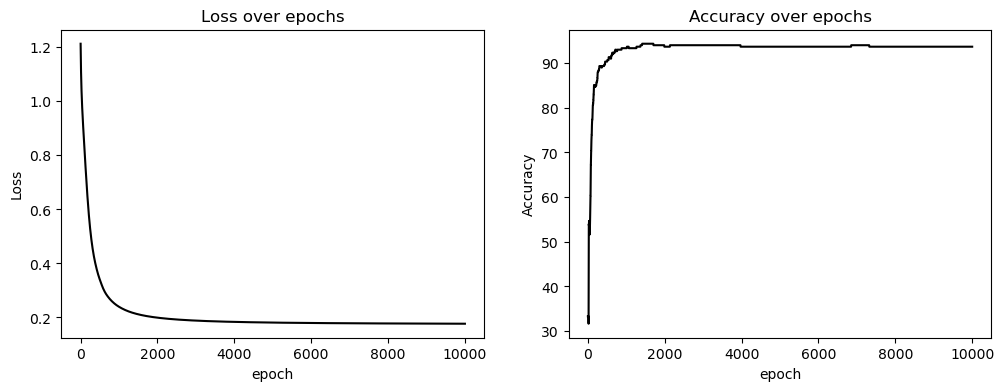

In [121]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].plot(loss_history.detach(), 'k')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss over epochs')
ax[1].plot(accuracy_history, 'k')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy over epochs')

### 5. check out the parameters

In [126]:
for i in ANNClassify.named_parameters():
    print(i)

('0.weight', Parameter containing:
tensor([[ 0.1298, -0.4438],
        [ 0.0551, -0.9896],
        [-0.1039,  1.0626],
        [-0.3777,  0.1081],
        [ 1.0531,  0.0063],
        [-0.4377, -0.1388],
        [ 0.9000,  0.6168],
        [-0.0067, -0.8005]], requires_grad=True))
('0.bias', Parameter containing:
tensor([ 0.5294,  0.4961,  1.5667,  1.3598,  0.0514, -0.4705, -1.1360, -0.0318],
       requires_grad=True))
('2.weight', Parameter containing:
tensor([[ 0.2169,  0.0761,  1.4222,  1.0285, -0.7598, -0.1302, -0.6702, -0.1445],
        [-0.6962, -0.4462, -0.6987, -0.7929,  0.2195, -0.1155,  1.1994,  0.0549],
        [ 0.1000,  1.0014, -0.6457, -0.0452,  0.0985,  0.1186, -0.3389,  0.4914]],
       requires_grad=True))
('2.bias', Parameter containing:
tensor([ 0.7007, -0.8732,  0.0572], requires_grad=True))
